In [74]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
def calculatez(mean, covariance):
    x, y = np.mgrid[-1:2:.05, -1:2:.05]
    data = np.column_stack([x.flat, y.flat])
    z = mvn.pdf(data,mean, covariance).reshape(x.shape)
#     z = rv.pdf(data)
    return x,y,z

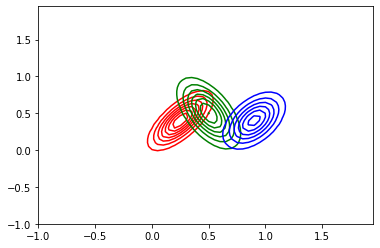

In [146]:
mean1 = np.array([0.25,0.40])

covariance1 = np.array([[0.1,0.05],
                [0.1,0.2]])
covariance1 /= 5
x1,y1,Z1=calculatez(mean1,covariance1)

mean2 = np.array([0.5,0.5])
covariance2 = np.array([[0.1,0.15],
                 [-0.1,0.3]])
covariance2 /= 5

x2,y2,Z2=calculatez(mean2,covariance2)               

mean3 = np.array([0.9,0.4])
covariance3 = np.array([[0.1,0.07],[0.07,0.2]])
covariance3 /= 5

x3,y3,Z3=calculatez(mean3,covariance3)  

plt.contour(x1, y1, Z1,colors='red')
plt.contour(x2, y2, Z2,colors='green')
plt.contour(x3, y3, Z3,colors='blue')
plt.show()



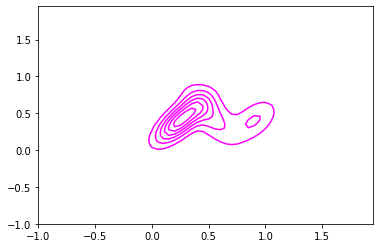

In [147]:
pi_1 = 0.5
pi_2 = 0.3
pi_3 = 0.2
Z=pi_1*Z1 + pi_2*Z2 + pi_3*Z3
plt.contour(x1,y1,Z,colors='magenta')

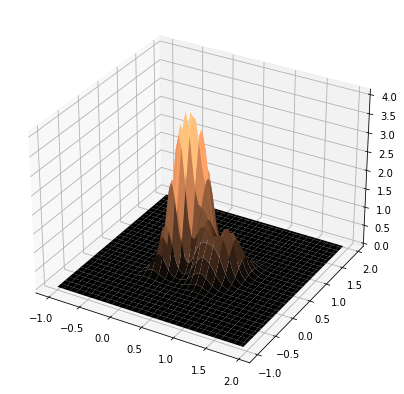

In [148]:
fig=plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(x1, y1, Z,cmap='copper', edgecolor='none')
plt.show()

In [149]:
arr=[]
mean = np.array([mean1,mean2,mean3])
cov = np.array([covariance1,covariance2,covariance3])

stock= np.random.multinomial(1,[pi_1,pi_2,pi_3],size=500)
stock = np.argmax(stock,axis=1)
print(stock)
for i in range(500):
    p=np.random.multivariate_normal(mean[stock[i]],cov[stock[i]],1)
    p.reshape(-1)
    p= np.append(p,stock[i])
    arr.append(p)

[1 1 0 1 0 0 0 1 2 2 2 0 0 0 1 0 2 0 0 0 0 0 1 0 0 0 0 1 0 1 2 2 1 2 2 0 1
 0 0 0 2 0 0 2 1 0 0 1 0 0 2 0 1 0 1 1 1 0 0 0 1 1 1 1 2 0 0 2 2 1 2 0 0 0
 1 0 1 0 0 1 2 0 2 2 2 0 0 2 0 2 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 2 0
 1 0 1 2 0 0 0 2 1 2 2 1 2 0 1 1 1 1 0 2 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0
 1 2 0 0 1 1 1 0 0 1 1 0 2 0 1 2 0 0 1 2 0 1 1 0 0 2 2 0 2 1 1 0 0 2 1 1 2
 0 1 1 0 1 1 2 0 2 2 1 0 0 1 0 0 1 2 0 1 0 1 0 0 1 1 1 0 0 2 0 1 2 0 0 0 2
 1 0 0 2 0 1 0 0 0 2 1 0 2 0 1 1 0 1 2 0 0 2 0 0 0 1 0 0 0 1 1 2 2 1 0 0 0
 1 0 2 1 0 2 1 0 0 1 0 0 0 0 1 2 2 0 1 0 2 0 0 0 2 0 1 0 0 0 0 0 2 0 1 2 1
 1 0 2 0 0 0 0 1 0 1 2 0 1 0 2 2 2 1 2 0 0 1 1 1 0 0 0 2 2 2 0 0 0 2 0 1 1
 1 0 1 2 0 0 1 0 1 0 2 2 1 0 0 1 1 0 0 0 2 0 1 0 0 0 0 1 2 1 0 0 0 0 0 2 2
 2 1 1 1 0 0 2 0 1 2 1 1 0 2 0 1 0 1 2 2 0 0 0 0 2 0 1 2 2 0 0 2 2 0 2 0 0
 0 2 2 0 1 2 2 0 0 0 0 2 0 1 0 2 0 0 0 0 0 0 0 0 1 2 0 0 1 1 0 0 0 1 2 0 2
 1 0 0 1 0 1 0 1 1 0 2 0 0 0 2 1 1 1 0 1 1 1 0 0 2 2 0 1 1 0 0 2 0 0 0 1 1
 0 1 1 1 1 1 0 1 0 0 0 2 

C:\Users\Somesh\AppData\Local\Temp/ipykernel_20208/885671090.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  p=np.random.multivariate_normal(mean[stock[i]],cov[stock[i]],1)


In [150]:
df= pd.DataFrame(arr)
df

,0,1,2
0,0.256027,0.737097,1.0
1,0.596689,0.249399,1.0
2,0.313435,0.324141,0.0
3,0.413529,0.898699,1.0
4,0.185753,0.364218,0.0
...,...,...,...
495,0.526293,0.803422,1.0
496,1.068664,0.742613,2.0
497,0.749618,-0.012140,2.0
498,0.381005,0.660869,1.0


<AxesSubplot:xlabel='0', ylabel='1'>

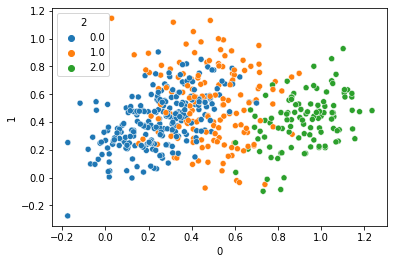

In [169]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2],palette='tab10')

In [166]:
posterior=np.zeros((500,3))
for i in range(500):
    posterior[i][0]=pi_1*mvn.pdf([df.iloc[i][0],df.iloc[i][0]],mean[0],cov[0])/(float)(len(df[df[2]==0]))
    posterior[i][1]=pi_2*mvn.pdf([df.iloc[i][1],df.iloc[i][1]],mean[1],cov[1])/(float)(len(df[df[2]==1]))
    posterior[i][2]=pi_3*mvn.pdf([df.iloc[i][2],df.iloc[i][2]],mean[2],cov[2])/(float)(len(df[df[2]==2]))
#     posterior[i][0]=posterior[i][0]/(posterior[i][0]+posterior[i][1]+posterior[i][2])
#     posterior[i][1]=posterior[i][1]/(posterior[i][0]+posterior[i][1]+posterior[i][2])
#     posterior[i][2]=posterior[i][2]/(posterior[i][0]+posterior[i][1]+posterior[i][2])

posterior /= np.sum(posterior, axis=0)

In [167]:
posterior

array([[4.67808720e-03, 8.83452453e-05, 6.49350558e-03],
       [2.31994820e-04, 5.39103997e-05, 6.49350558e-03],
       [4.23421959e-03, 5.88699386e-04, 5.83417358e-10],
       ...,
       [9.12570088e-06, 1.71389361e-11, 7.07945648e-19],
       [3.04877303e-03, 8.59602694e-04, 6.49350558e-03],
       [2.47862910e-08, 3.73802878e-04, 7.07945648e-19]])

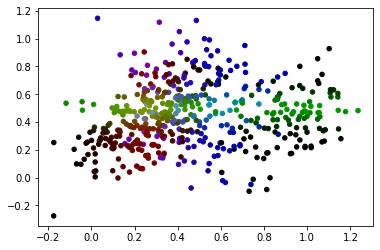

In [168]:
x = df[0]
y = df[1]
rgb = posterior*100

fig, ax = plt.subplots()
plt.scatter(x, y, s=20, facecolors=rgb)
plt.show()

